<a href="https://colab.research.google.com/github/pitimonb/coal_analysis/blob/main/coal_analysis_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 4.3MB/s 
     |████████████████████████████████| 112kB 14.7MB/s 
  Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


# Setup Enviroment

In [ ]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import time
from tensorflow import keras
from tensorflow.keras import layers

# Setup State
y = yes
n = no

In [ ]:
train_state = 'y'
early_stop_state = 'n'
save_state = 'y'
model_num = 3
coal_prop = ['Carbon','Hydrogen','Nitrogen']

# Import Dataset using pandas

In [ ]:
#hhv_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/coal_hhv_ds.csv"
#lhv_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/coal_lhv_ds.csv"
car_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/001/coal_car_ds.csv"
hyd_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/001/coal_hyd_ds.csv"
nit_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/001/coal_nit_ds.csv"
#oxy_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/coal_oxy_ds.csv"
#sul_exc_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/coal_sul_exc_ds.csv"
#hyd_exc_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/coal_hyd_exc_ds.csv"
#oxy_exc_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/main/dataset/coal_oxy_exc_ds.csv"
#hhv_dataset = pd.read_csv(hhv_dataset_url)
#lhv_dataset = pd.read_csv(lhv_dataset_url)
car_dataset = pd.read_csv(car_dataset_url)
hyd_dataset = pd.read_csv(hyd_dataset_url)
nit_dataset = pd.read_csv(nit_dataset_url)
#oxy_dataset = pd.read_csv(oxy_dataset_url)
#sul_exc_dataset = pd.read_csv(sul_exc_dataset_url)
#hyd_exc_dataset = pd.read_csv(hyd_exc_dataset_url)
#oxy_exc_dataset = pd.read_csv(oxy_exc_dataset_url)
#print(car_dataset)

In [ ]:
dataset = [car_dataset,hyd_dataset,nit_dataset]

# Input Data

In [ ]:
#input_data = {'p_mois':[17.3],'p_vol':[33.55],'p_ash':[27.56],'p_car':[21.17],'p_sul':[2.4]} #USe
input_data = {'p_mois':[17.73],'p_vol':[33.55],'p_ash':[27.56],'p_car':[21.17],'p_sul':[2.4]}
input_data = pd.DataFrame(data = input_data)
#print(input_data)

# Split data into Train and Test

In [ ]:
ds_frac = 0.8
def train_ds(x):
  return (x.sample(frac = ds_frac,random_state = 0))
def test_ds (x):
  return x.drop((x.sample(frac = ds_frac,random_state = 0)).index)

In [ ]:
train_dataset = [1,2,3]
for i in range(model_num):
  train_dataset[i] = train_ds(dataset[i])
test_dataset = [1,2,3]
for i in range (model_num):
  test_dataset[i] = test_ds(dataset[i])

#print(train_dataset[2])
#print(test_dataset[2])

# Inspect Data

In [ ]:
#sns.pairplot(train_dataset[0][["p_mois","p_vol","p_ash","p_car","p_sul","p_hhv"]], diag_kind="kde")
#sns.pairplot(train_dataset[1][["p_mois","p_vol","p_ash","p_car","p_sul","l_hhv"]], diag_kind="kde")
##sns.pairplot(train_dataset[0][["p_mois","p_vol","p_ash","p_car","p_sul","u_car"]], diag_kind="kde")# Use
##sns.pairplot(train_dataset[1][["p_mois","p_vol","p_ash","p_car","p_sul","u_hyd"]], diag_kind="kde")# Use
##sns.pairplot(train_dataset[2][["p_mois","p_vol","p_ash","p_car","p_sul","u_nit"]], diag_kind="kde")# Use
#sns.pairplot(train_dataset[5][["p_mois","p_vol","p_ash","p_car","p_sul","u_oxy"]], diag_kind="kde")
#sns.pairplot(train_dataset[6][["p_mois","p_vol","p_ash","p_car","p_sul","u_sul_exc"]], diag_kind="kde")
#sns.pairplot(train_dataset[7][["p_mois","p_vol","p_ash","p_car","p_sul","u_hyd_exc"]], diag_kind="kde")
#sns.pairplot(train_dataset[8][["p_mois","p_vol","p_ash","p_car","p_sul","u_oxy_exc"]], diag_kind="kde")

# Overall Stat

In [ ]:
train_stats = [1,2,3]
train_pop = ["u_car","u_hyd","u_nit"]
for i in range(model_num):
  train_stats[i] = train_dataset[i].describe()
  train_stats[i].pop(str(train_pop[i]))
  train_stats[i] = train_stats[i].transpose()
train_stats[1]

,count,mean,std,min,25%,50%,75%,max
p_mois,362.0,13.186215,2.215375,8.28,11.6425,13.370,14.5850,19.25
p_vol,362.0,35.040552,1.391566,32.08,34.0100,34.925,35.8900,39.68
p_ash,362.0,29.698619,4.135234,18.32,26.7175,29.905,32.7575,39.69
p_car,362.0,22.078149,2.936709,15.37,20.0450,22.300,23.9150,32.02
p_sul,362.0,3.236961,0.450471,1.89,2.9200,3.215,3.5300,4.73


# Split feature form label
Separate the target value (label) form feature. Label = value that train model to predict.

In [ ]:
train_label = [1,2,3]
test_label = [1,2,3]
for i in range(model_num):
  train_label[i] = train_dataset[i].pop(str(train_pop[i]))
  test_label[i] = test_dataset[i].pop(str(train_pop[i]))

#print(train_label[1])
#print(test_label[1])

# Normalize Data

In [ ]:
normed_train_data = [1,2,3]
normed_test_data = [1,2,3]
normed_input_data = [1,2,3]
for i in range(model_num):
  normed_train_data[i] = (train_dataset[i] - train_stats[i]['mean']) / train_stats[i]['std']
  normed_test_data[i] = (test_dataset[i] - train_stats[i]['mean']) / train_stats[i]['std']
  normed_input_data[i] = (input_data - train_stats[i]['mean']) / train_stats[i]['std']
#print(normed_train_data[1])
#print(normed_test_data[1])
#print(normed_input_data[0])
#print(train_stats[0]['mean'])
#print(train_stats[0]['std'])

# The Model

In [ ]:
def build_model_1(x):
  model = keras.Sequential([
    layers.Dense(512,activation = tf.nn.relu, input_shape = [len(x.keys())]),
    layers.Dense(256,activation = tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile (loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
  return model

In [ ]:
def build_model_2(x):
  model = keras.Sequential([
    layers.Dense(1024,activation = tf.nn.relu, input_shape = [len(x.keys())]),
    layers.Dense(512,activation = tf.nn.relu),
    layers.Dense(256,activation = tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile (loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
  return model

In [ ]:
def build_model_3(x):
  model = keras.Sequential([
    layers.Dense(64,activation = tf.nn.relu, input_shape = [len(x.keys())]),
    layers.Dense(32,activation = tf.nn.relu),
    #layers.Dense(256,activation = tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile (loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
  return model

In [ ]:
model_pre = [1,2,3]
for i in range(model_num):
  model_pre[i] = build_model_3(train_dataset[i])

#Train Model
Train model for 1000 epochs, and recoed the training and validation accuracy in the history object.

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end = '')
  
EPOCHS = 1500

In [ ]:
history = [1,2,3]
if train_state == 'y':
  if early_stop_state == 'y':
    for i in range(model_num):
      early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
      history[i] = model_pre[i].fit(
      normed_train_data[i], train_label[i],
      epochs = EPOCHS, validation_split = 0.2, verbose = 0,
      callbacks = [early_stop, PrintDot()])
      print(' Finish train model: ' + str(coal_prop[i]))
  else:
    for i in range(model_num):
      history[i] = model_pre[i].fit(
      normed_train_data[i], train_label[i],
      epochs = EPOCHS, validation_split = 0.2, verbose = 0,
      callbacks = [PrintDot()])
      print(' Finish train model: ' + str(coal_prop[i]))
else:
  print('Not train')


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualize the model's training progress using the stat stored in the History object.

In [ ]:
def plot_history(history):

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.xlabel('Mean Abs Error [Output]')
  plt.plot(hist['epoch'], hist['mae'],
           label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()
  plt.title(coal_prop[i])

  plt.figure()
  plt.xlabel('Epoch')
  plt.xlabel('Mean Square Error [$Output^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.title(coal_prop[i])

************************************************************************************
Carbon
          loss       mae       mse  val_loss   val_mae   val_mse  epoch
1495  0.308777  0.391213  0.308777  1.097437  0.890297  1.097437   1495
1496  0.320620  0.414506  0.320620  0.643541  0.675809  0.643541   1496
1497  0.265392  0.370612  0.265392  0.657111  0.627724  0.657111   1497
1498  0.277050  0.395690  0.277050  0.435752  0.533719  0.435752   1498
1499  0.261961  0.386264  0.261961  0.673234  0.619837  0.673234   1499
************************************************************************************
Hydrogen
          loss       mae       mse  val_loss   val_mae   val_mse  epoch
1495  0.011059  0.062320  0.011059  0.032151  0.153292  0.032151   1495
1496  0.011156  0.066867  0.011156  0.026347  0.128145  0.026347   1496
1497  0.011069  0.069377  0.011069  0.037626  0.159340  0.037626   1497
1498  0.012066  0.064476  0.012066  0.018711  0.106402  0.018711   1498
1499  0.008267  0.0519

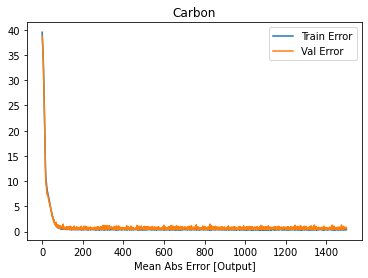

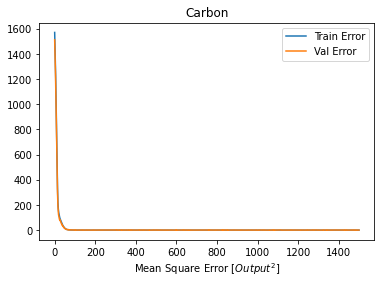

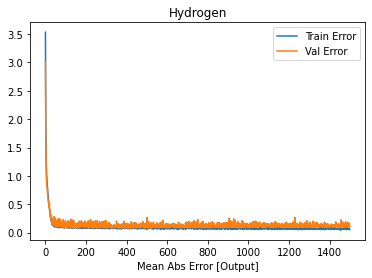

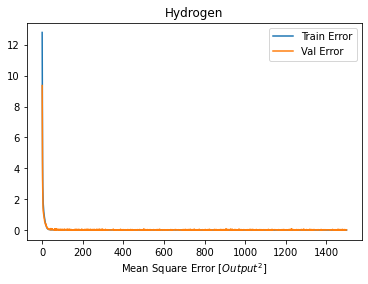

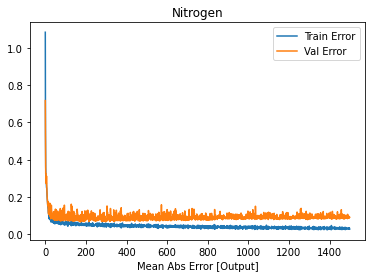

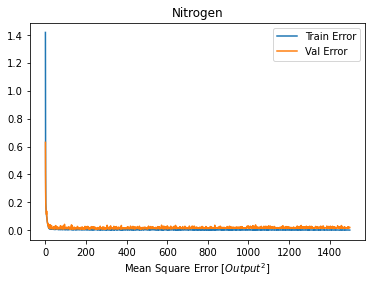

In [ ]:
hist = [1,2,3]
if train_state == 'y':
  for i in range(model_num):
    hist[i] = pd.DataFrame(history[i].history)
    hist[i]['epoch'] = history[i].epoch
    print('************************************************************************************')
    print(coal_prop[i])
    print(hist[i].tail())
    #plot_history(history[i],coal_prop[i])
    plot_history(history[i])
else:
  print()

In [ ]:
rmse_val = [1,2,3]
for i in range(model_num):
  loss_val, mae_val, mse_val = model_pre[i].evaluate(normed_test_data[i], test_label[i], verbose = 0)
  rmse_val[i] = math.sqrt(mse_val)
  print(coal_prop[i])
  print("Testing set Mean Abs Error: {:5.2f}".format(mae_val))
  print("Testing set RMSE: {:5.2f}".format(math.sqrt(mse_val)))
  print('**********************************************************')


Carbon
Testing set Mean Abs Error:  0.56
Testing set RMSE:  0.75
**********************************************************
Hydrogen
Testing set Mean Abs Error:  0.10
Testing set RMSE:  0.14
**********************************************************
Nitrogen
Testing set Mean Abs Error:  0.07
Testing set RMSE:  0.09
**********************************************************


# Make Prediction
Predict Output value using data in testing set

In [ ]:
test_pred = [1,2,3]
for i in range(model_num):
  test_pred[i] = model_pre[i].predict(normed_test_data[i]).flatten()

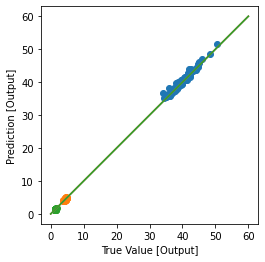

In [ ]:
for i in range(model_num):
  plt.scatter(test_label[i], test_pred[i])
  #plt.title(coal_prop[i])
  plt.xlabel('True Value [Output]')
  plt.ylabel('Prediction [Output]')
  plt.axis('equal')
  plt.axis('square')
  _ = plt.plot([0,60], [0,60])

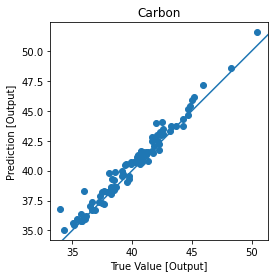

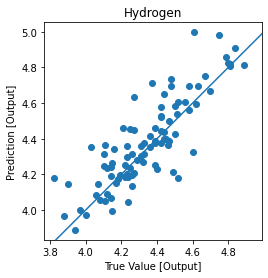

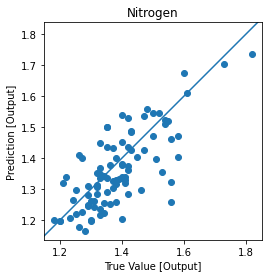

In [ ]:
for i in range(model_num):
  plt.scatter(test_label[i], test_pred[i])
  plt.title(coal_prop[i])
  plt.xlabel('True Value [Output]')
  plt.ylabel('Prediction [Output]')
  plt.axis('equal')
  plt.axis('square')
  _ = plt.plot([0,100], [0,100])
  plt.show()

# Save Model

In [ ]:
model_save_name = ['car_model_000.h5','hyd_model_000.h5','nit_model_000.h5']
if save_state == 'y':
  for i in range(model_num):
    model_pre[i].save(model_save_name[i])
    !tensorflowjs_converter --input_format=keras /content/car_model_000.h5 /content/js/car
    !tensorflowjs_converter --input_format=keras /content/hyd_model_000.h5 /content/js/hyd
    !tensorflowjs_converter --input_format=keras /content/nit_model_000.h5 /content/js/nit
  print("Model Saved")
else:
  print("Not save model") 

model_prod = [1,2,3]
for i in range(model_num):
  model_prod[i] = keras.models.load_model(model_save_name[i])

2021-02-15 05:55:33.926390: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-15 05:55:36.958895: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-15 05:55:40.043385: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-15 05:55:43.496018: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-15 05:55:46.577697: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-15 05:55:49.701776: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-15 05:55:52.887001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic libr

In [ ]:
!ls

car_model_000.h5  hyd_model_000.h5  js	nit_model_000.h5  sample_data


In [ ]:
rmse_val_prod = [1,2,3]
for i in range(model_num):
  loss_val_prod, mae_val_prod, mse_val_prod = model_prod[i].evaluate(normed_test_data[i], test_label[i], verbose = 0)
  rmse_val_prod[i] = math.sqrt(mse_val_prod)
  print(coal_prop[i])
  print("Testing set Mean Abs Error: {:5.2f}".format(mae_val_prod))
  print("Testing set RMSE: {:5.2f}".format(math.sqrt(mse_val_prod)))
  print('**********************************************************')

Carbon
Testing set Mean Abs Error:  0.56
Testing set RMSE:  0.75
**********************************************************
Hydrogen
Testing set Mean Abs Error:  0.10
Testing set RMSE:  0.14
**********************************************************
Nitrogen
Testing set Mean Abs Error:  0.07
Testing set RMSE:  0.09
**********************************************************


# Data Input Result

In [ ]:
print(normed_input_data[0])

     p_mois     p_vol    p_ash    p_car     p_sul
0  2.051023 -1.071134 -0.51717 -0.30924 -1.857969


In [ ]:
input_data_pred = model_pre[0].predict(normed_input_data[0])
input_data_pred

array([[41.04727]], dtype=float32)

In [ ]:
input_data_pred = [1,2,3]
print('Pre-production Model:')
for i in range(model_num):
  input_data_pred[i] = model_pre[i].predict(normed_input_data[i]).flatten()
  input_data_pred[i] = float(input_data_pred[i])
  print(str(coal_prop[i]) + ": {:5.3f}".format(input_data_pred[i]) + "  ,RMSE: {:5.3f}".format(rmse_val[i]))
print('***************************************************************************************')
print('Prodution Model:')
for i in range(model_num):
  input_data_pred[i] = model_prod[i].predict(normed_input_data[i]).flatten()
  input_data_pred[i] = float(input_data_pred[i])
  print(str(coal_prop[i]) + ": {:5.3f}".format(input_data_pred[i]) + "  ,RMSE: {:5.3f}".format(rmse_val_prod[i]))

Pre-production Model:
Carbon: 41.047  ,RMSE: 0.752
Hydrogen: 5.022  ,RMSE: 0.143
Nitrogen: 1.369  ,RMSE: 0.090
***************************************************************************************
Prodution Model:
Carbon: 41.047  ,RMSE: 0.752
Hydrogen: 5.022  ,RMSE: 0.143
Nitrogen: 1.369  ,RMSE: 0.090
